In [ ]:
#/content -root drive

In [ ]:
#Install SRA toolkit
!apt-get install -y sra-toolkit

#### fastq-dump

fastq-dump is a SRA toolkit for converting SRA files to FASTQ format.

In [50]:
# Create a directory to store the FASTQ files
!mkdir -p raw_fastq

# Download and convert the SRA data to FASTQ format
!fastq-dump SRR26832288 --outdir raw_fastq


Read 501835 spots for SRR26832288
Written 501835 spots for SRR26832288


+ Output shows that the tool successfully read 501,835 sequencing reads (spots) from the SRA file with the identifier SRR26832288. It also successfully wrote same number to the output file

+ A read is a fundamental unit of data in sequencing experiments, representing a segment of nucleotides from the original DNA or RNA.





In [51]:
# Another method to manaully check and confirm the number of reads
!echo $(( $(wc -l < raw_fastq/SRR26832288.fastq) / 4 )) # 4 is used because each read entry consists of four lines


501835


FASTQ Format:

Most DNA sequencing technology typical outputs are in the form of a FASTQ format, containing at least the obtained nucleotide sequence as well as a quality score for each nucleotide.

Each entry consists of four lines:
+ Line 1: Sequence identifier, often starting with '@'.
+ Line 2: Nucleotide sequence (A, C, G, T). The character N may be included
+ Line 3: Separator line (usually a '+').
+ Line 4: Quality scores corresponding to each base in the sequence. Phred quality score to measure the accuracy of each base called.

In [ ]:
# Fist 10 lines of the raw Fasta file
! head -n 10 raw_fastq/SRR26832288.fastq

#### To display a FASTQ file in a tabular format

In [52]:
#- - - means create 3lines. indicates that each line should be taken from a different column
!cat raw_fastq/SRR26832288.fastq | paste - - - ->SRR26832288_tab.txt

In [53]:
! head -n 10 SRR26832288_tab.txt

@SRR26832288.1 M04882:215:000000000-JG584:1:1101:18727:1029 length=348	NTNGTGNNCNANCTNNNNTNANCNANAGGNTGNNCANNNAGGGCCACTTGANNTGGACCGGTGGGAACACGTTTTTCAGGTCCTCNAGCANGGTCANCCTGCTGCCNGCNCNGNANNTNNGNNNNTNGNNCCCANGTNCNCNGGCGCNCNNNNNCNNAAGGGANNNNNTACTGCTNNCANNNNNGTANNNANNNNNNTCNCNNNNTTCNGAGGGCTGNANNNNNAGNGNGGAGAATGNTNCNTTAGGCATNNNNNNTNAGAATCGATCCTCNGNNATCNNNNNANNNTCTATNNNNANGTTGTNGNTNNAGTNANNGNNNAACNNNNGTNNCCNNATNNTGGNNTGTC	+SRR26832288.1 M04882:215:000000000-JG584:1:1101:18727:1029 length=348	#8#8AF##=#=#=C####=#:#9#:#:CC#:C##,:###::CFFGFGGGFF##8ACGGGAGGGGGGGGGGGGGGGGGGGGGGGGG#6CFG#6CDFF#:C@EGGGGG#:C#:#:#:##:##:####:#:##::FF#:9#:#:#6:FFG#:#####:##::DFCF#####9:BFGGA##::#####::4###3######83#:####::B#:@FGFGGE#:#####56#6#6@*>FFGF#*#5#66>8CC9?######4#*41=F@FG5CBFC#3##3*3#####3###*21;*####2#225C:#1#2##12*#1##2###11/####1*##11##))##119##))-(
@SRR26832288.2 M04882:215:000000000-JG584:1:1101:10173:1030 length=348	NTNGTGNNANATGCGTNNTNATACANAGGNCTNNGAGANGGGCTGACTTGANNTGGACCGGTGGGAACACGTTTTTCAGGTCCTCGAGC

This presents the read/data in a more readable format.


**FASTQ READ QUALITY CONTROL CHECK**

In [ ]:
#Using Fastqc
!apt-get install -y fastqc

In [9]:
# Running FastQC on the FASTQ file
#This generates html file that can be viewed in a browser and a zip file for the fastqc file
!mkdir raw_fastq/quality_control
!fastqc raw_fastq/SRR26832288.fastq -o raw_fastq/quality_control


Started analysis of SRR26832288.fastq
Approx 5% complete for SRR26832288.fastq
Approx 10% complete for SRR26832288.fastq
Approx 15% complete for SRR26832288.fastq
Approx 20% complete for SRR26832288.fastq
Approx 25% complete for SRR26832288.fastq
Approx 30% complete for SRR26832288.fastq
Approx 35% complete for SRR26832288.fastq
Approx 40% complete for SRR26832288.fastq
Approx 45% complete for SRR26832288.fastq
Approx 50% complete for SRR26832288.fastq
Approx 55% complete for SRR26832288.fastq
Approx 60% complete for SRR26832288.fastq
Approx 65% complete for SRR26832288.fastq
Approx 70% complete for SRR26832288.fastq
Approx 75% complete for SRR26832288.fastq
Approx 80% complete for SRR26832288.fastq
Approx 85% complete for SRR26832288.fastq
Approx 90% complete for SRR26832288.fastq
Approx 95% complete for SRR26832288.fastq
Analysis complete for SRR26832288.fastq


In [11]:
#The content of the directory after FASTQC is used on the raw FASTA file
!ls -lh raw_fastq/quality_control

total 1.3M
-rw-r--r-- 1 root root 716K Aug  9 12:48 SRR26832288_fastqc.html
-rw-r--r-- 1 root root 589K Aug  9 12:48 SRR26832288_fastqc.zip


##### FASTQC report display in google colab using IPython.display

If Jupyter notebook is used, it can be used to open the report directly in the web browser

Measure,Value
Filename,SRR26832288.fastq
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,501835
Sequences flagged as poor quality,0
Sequence length,348
%GC,52

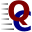
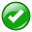
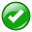
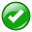
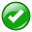
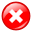
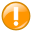
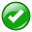
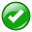
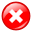
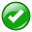
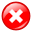
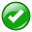
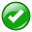
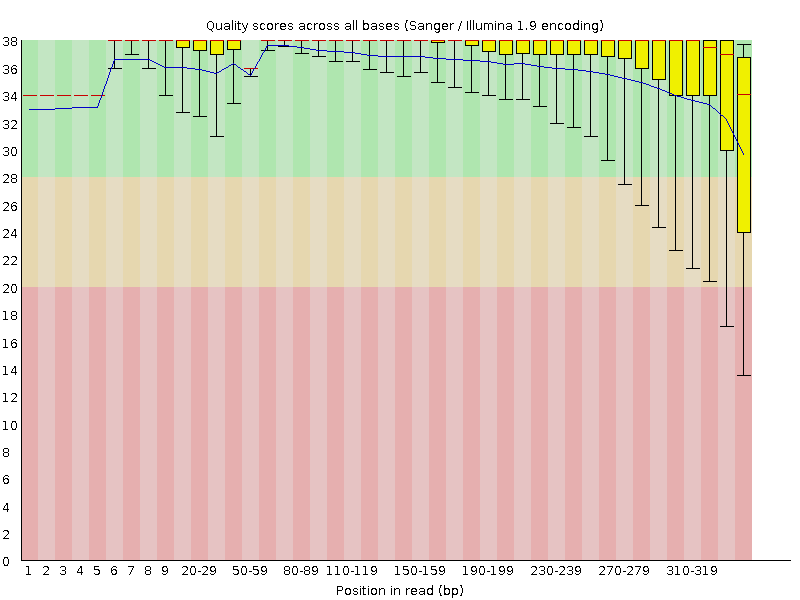
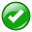
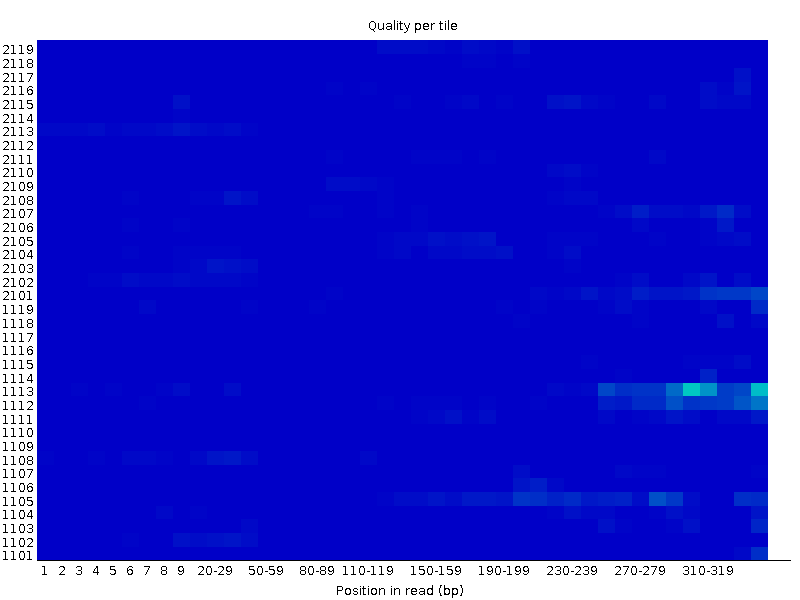
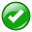
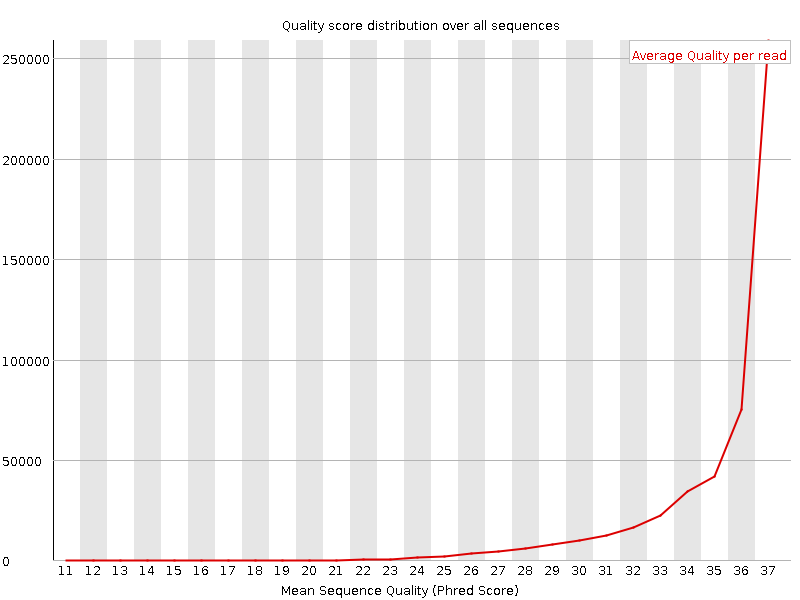
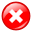
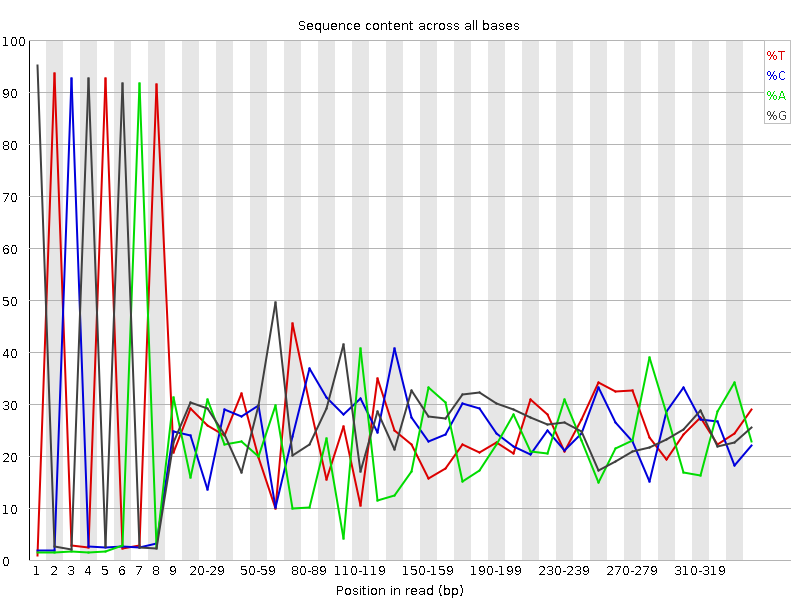
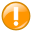
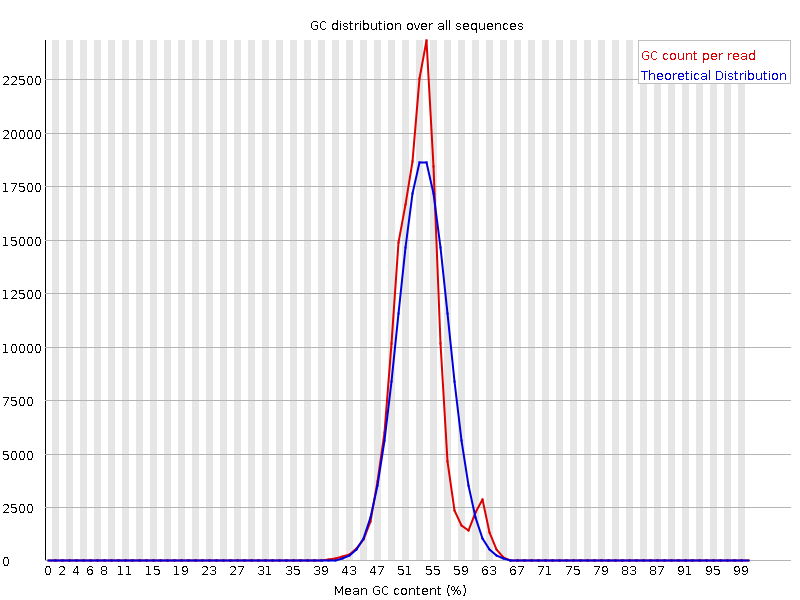
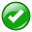
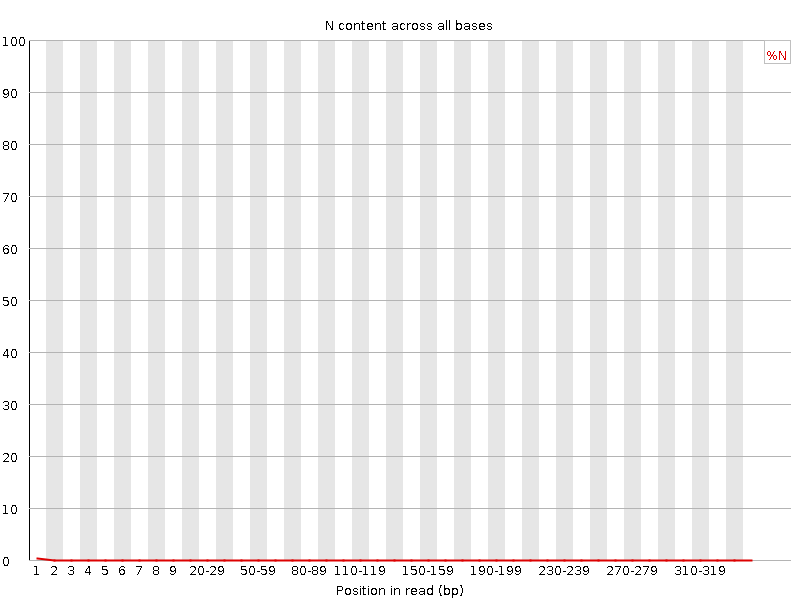
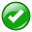
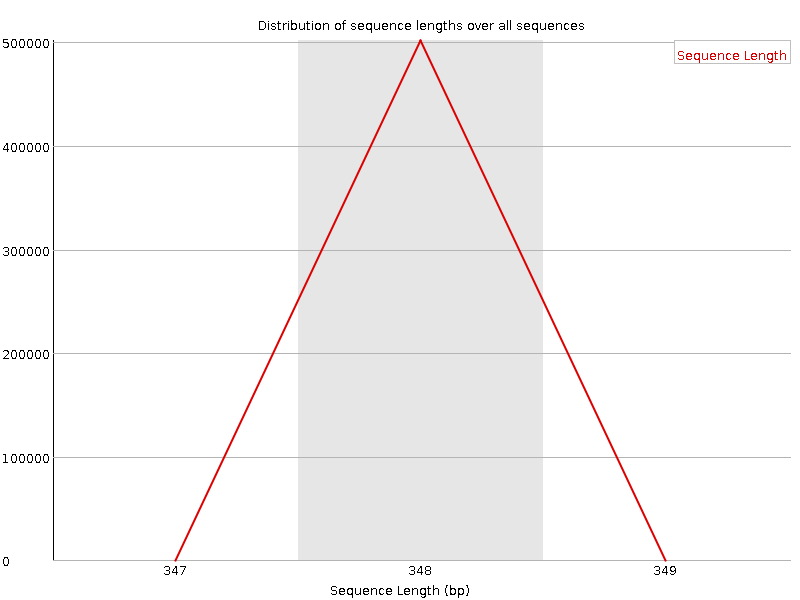
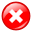
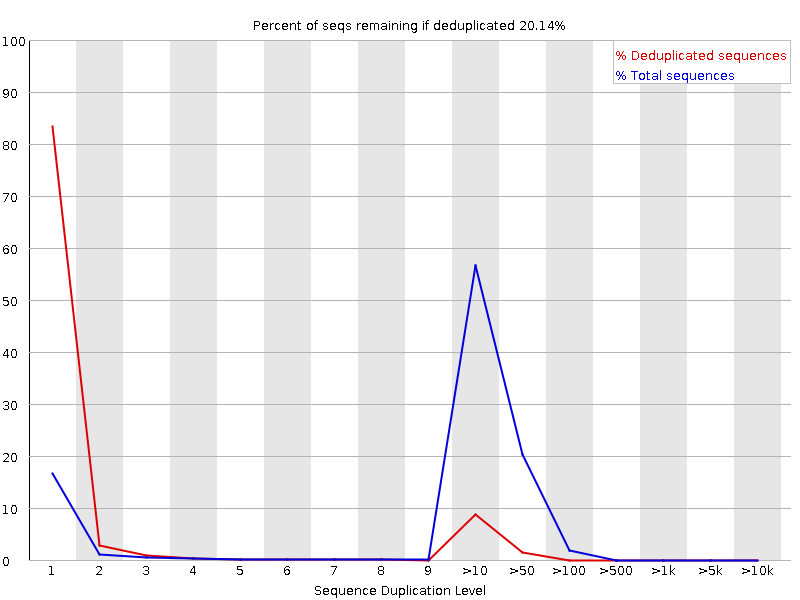
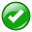
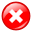
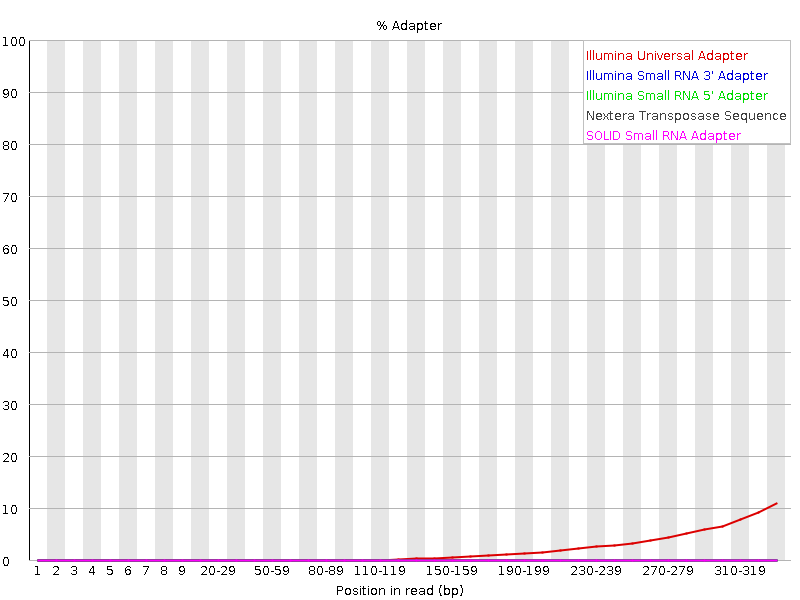

In [14]:
from IPython.display import display, HTML
display(HTML('/content/raw_fastq/quality_control/SRR26832288_fastqc.html'))

**PREPROCESSING OF THE FASTQ READS**

(i) trimming the ends of the reads
(ii) removing low-quality reads
(iii) masking low-quality bases.

In [ ]:
! pip install cutadapt

In [17]:
!mkdir raw_fastq/cutadapt

+ --cut 10: This option specifies the number of bases (10) to remove from the beginning of each read
+ --minimum-length 25: Specifies the minimum length (25) a read must have after trimming. Anything less than that is discarded.
+	-q 30: This option sets the quality threshold. Bases with a quality score below 30 will be trimmed.


In [18]:
! cutadapt --cut 10 --minimum-length 25 -q 30 -o raw_fastq/cutadapt/trim.fastq raw_fastq/SRR26832288.fastq

This is cutadapt 4.9 with Python 3.10.12
Command line parameters: --cut 10 --minimum-length 25 -q 30 -o raw_fastq/cutadapt/trim.fastq raw_fastq/SRR26832288.fastq
Processing single-end reads on 1 core ...
Done           00:00:03       501,835 reads @   7.7 µs/read;   7.80 M reads/minute
Finished in 3.863 s (7.698 µs/read; 7.79 M reads/minute).

=== Summary ===

Total reads processed:                 501,835

== Read fate breakdown ==
Reads that were too short:               3,094 (0.6%)
Reads written (passing filters):       498,741 (99.4%)

Total basepairs processed:   174,638,580 bp
Quality-trimmed:              10,508,374 bp (6.0%)
Total written (filtered):    159,099,267 bp (91.1%)


In [20]:
#content of the trimmed reads
!ls -lh raw_fastq/cutadapt/

total 342M
-rw-r--r-- 1 root root 342M Aug  9 13:03 trim.fastq


Quality control and Assessment for the trimmed data

In [21]:
!mkdir raw_fastq/quality_control2


In [ ]:
!fastqc raw_fastq/cutadapt/trim.fastq -o raw_fastq/quality_control2


In [25]:
!ls -l /content/raw_fastq/quality_control2/

total 1276
-rw-r--r-- 1 root root 754465 Aug  9 13:04 trim_fastqc.html
-rw-r--r-- 1 root root 546279 Aug  9 13:04 trim_fastqc.zip


Measure,Value
Filename,trim.fastq
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,498741
Sequences flagged as poor quality,0
Sequence length,25-338
%GC,52

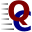
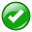
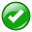
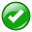
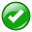
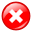
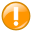
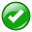
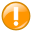
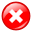
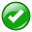
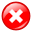
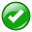
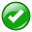
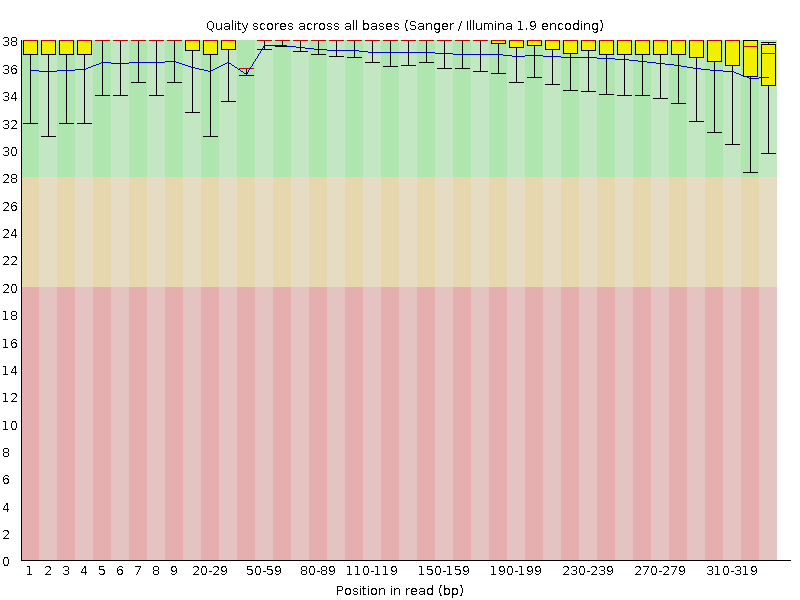
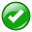
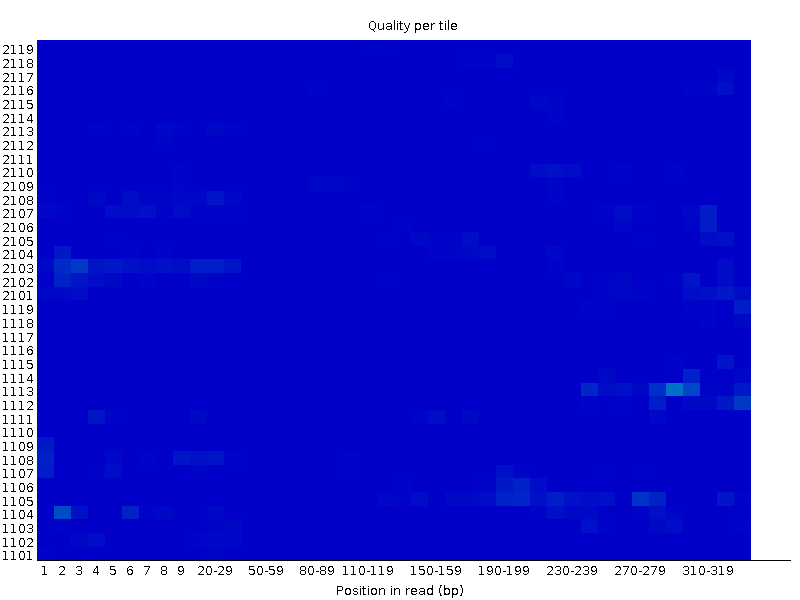
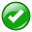
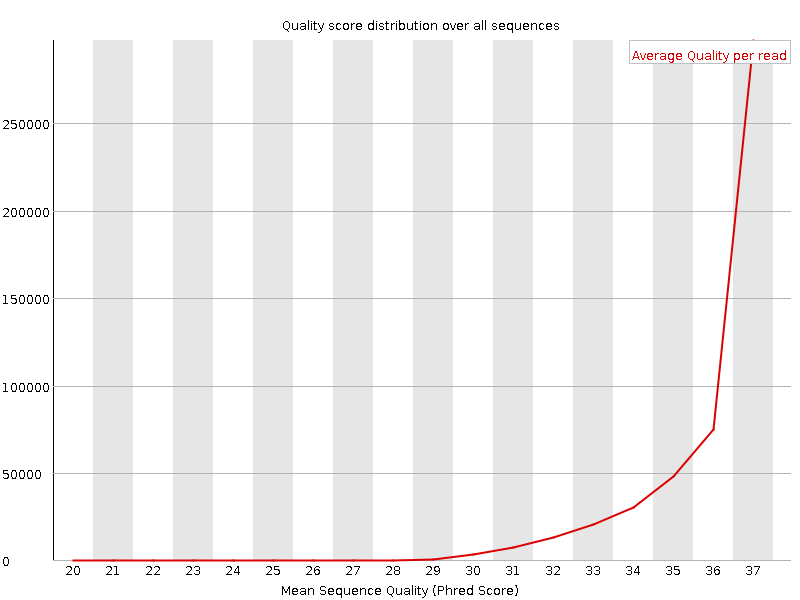
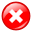
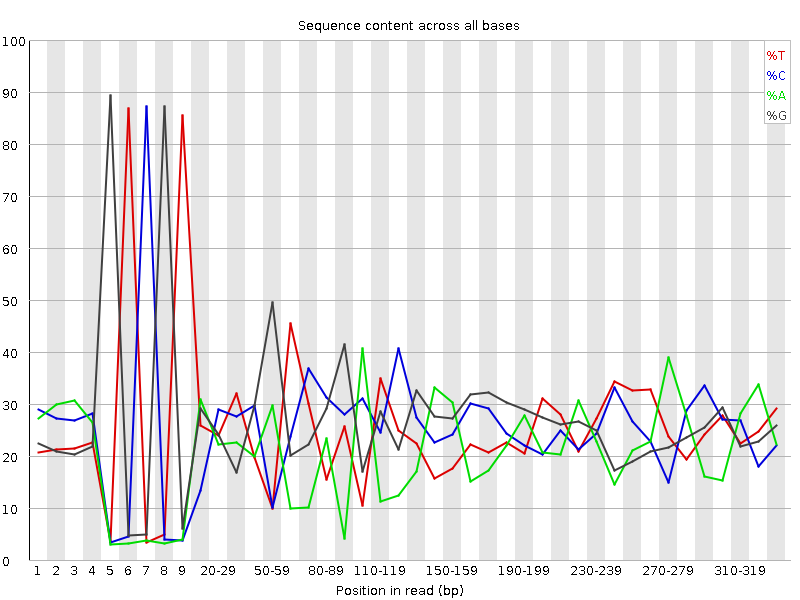
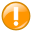
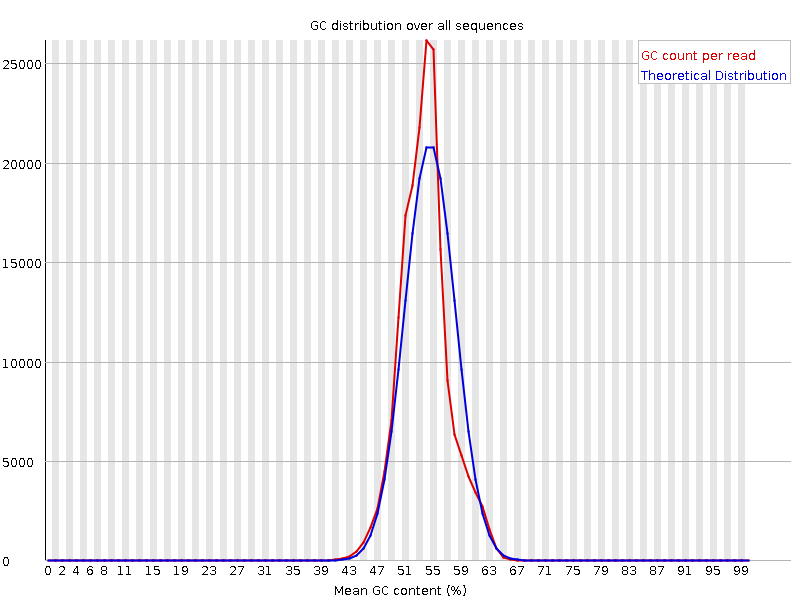
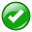
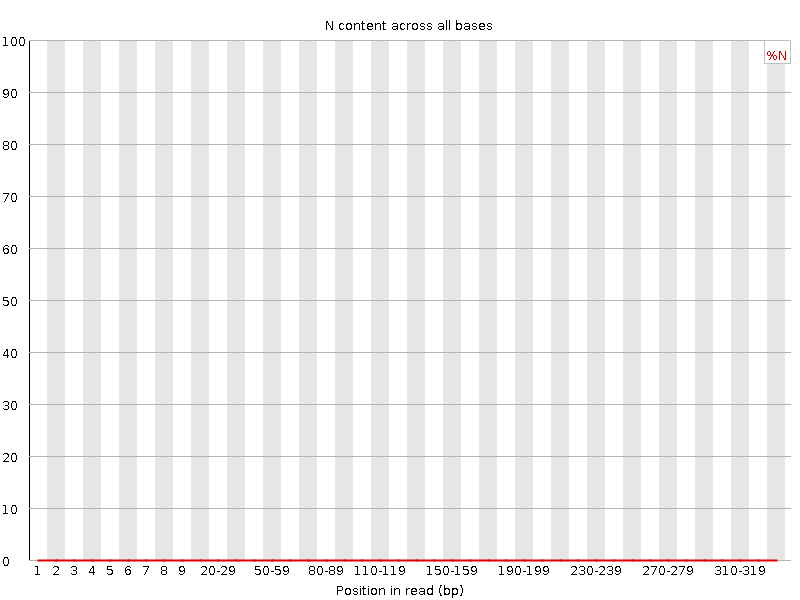
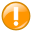
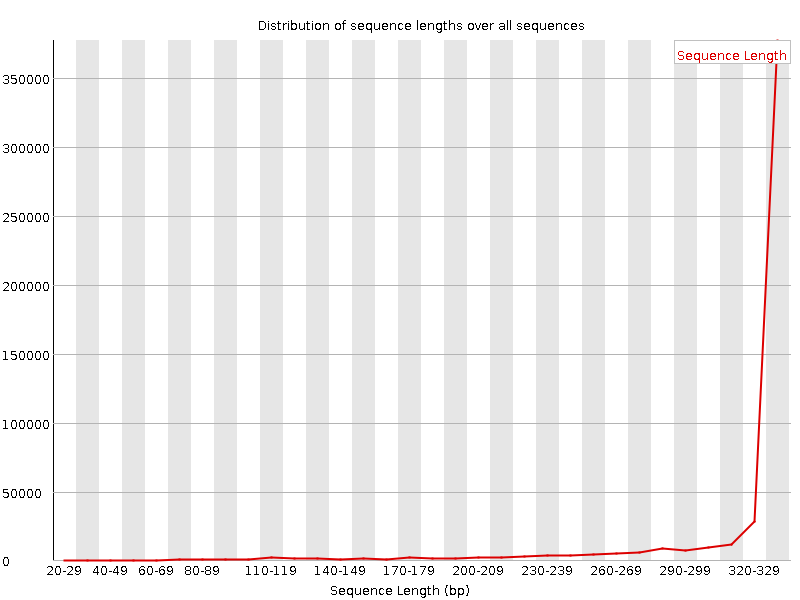
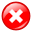
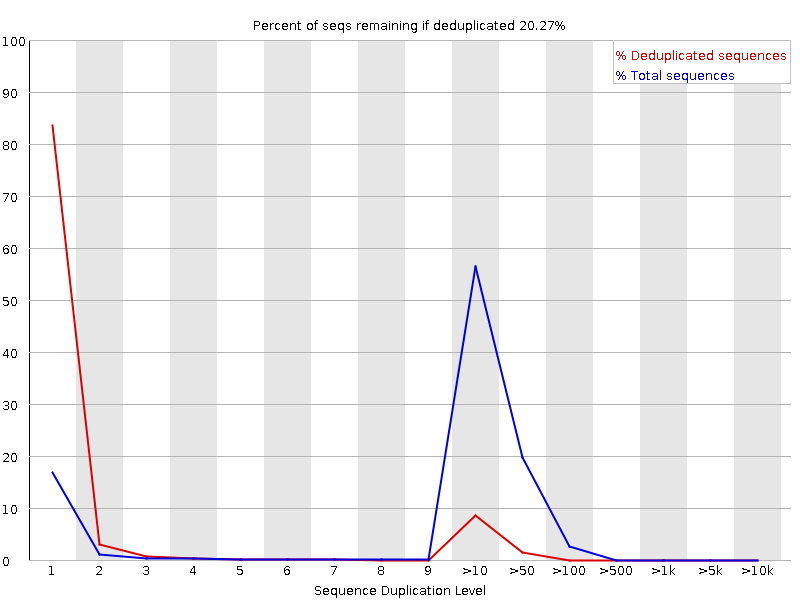
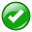
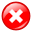
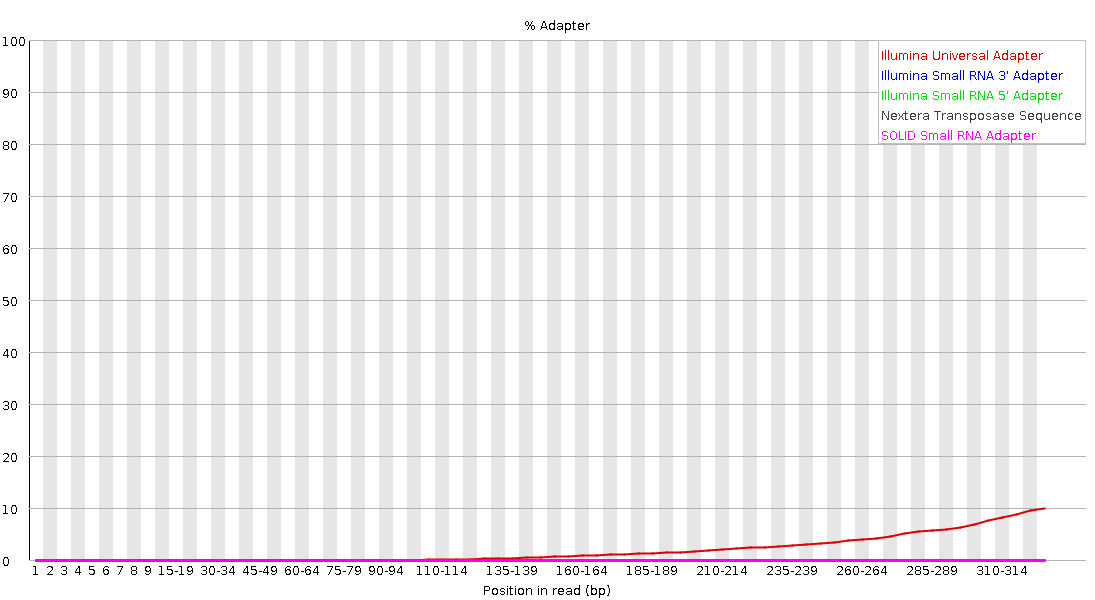

In [26]:
#To view difference between processed with cutadapt and not processed
from IPython.display import display, HTML
display(HTML('/content/raw_fastq/quality_control2/trim_fastqc.html'))


#### Comparing both reports
Comparing Per base sequence quality which is a very crucial metric in sequencing analysis for both report, the second one now has all its boxplots within the Green background, indicating that they are all very good for further downstream analysis

## Mapping of Sequence Reads to a Reference Genome

Reference Genome is a standardized DNA sequence representing a species, created by integrating data from multiple healthy individuals. It minimizes individual variations and serves as a benchmark for comparing individual genomes.


Required Files for Mapping:

+ **FASTA File:** Contains the reference genome sequence.
FASTQ Files: Contain the short-sequence reads to be aligned.

+ **Annotation Files (GFF/GTF):** Provide additional gene information.

+ **Alignment Process:** Involves using an aligner program to map the reads from FASTQ files to the reference genome in the FASTA file, resulting in aligned reads stored in SAM format.

+ **Indexing Reference Genome:**
The reference genome must be in properly formatted FASTA for indexing with the samtools faidx command. Each sequence must have a unique ID, and sequence lines should be of equal length.









In [ ]:
!apt-get install -y wget

**REFERENCE GENOME (FASTA FORMAT) AND ANNOTATION(GTF) DOWNLOAD**

For tools like STAR, downloading the human reference genome and GTF annotation file from UCSC, as UCSC maintains the gene annotations in the required GTF format.


gunzip: This is a command-line utility used to decompress files that were compressed using the gzip compression algorithm.
Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz: Specifies the compressed file to be decompressed.

In [ ]:
# Step 1: Create a directory to store the files
!mkdir -p /content/genome_data

# Step 2: Download the genome sequence (FASTA) and annotation file (GTF)
!wget -O /content/genome_data/hg38.fa.gz http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!wget -O /content/genome_data/hg38.ncbiRefSeq.gtf.gz http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.ncbiRefSeq.gtf.gz

# Step 3: Uncompress the downloaded files
!gunzip /content/genome_data/hg38.fa.gz
!gunzip /content/genome_data/hg38.ncbiRefSeq.gtf.gz


In [29]:
! ls -l /content/genome_data/

total 4007764
-rw-r--r-- 1 root root 3273481150 Jan 16  2014 hg38.fa
-rw-r--r-- 1 root root  830456047 Oct 28  2022 hg38.ncbiRefSeq.gtf


In [30]:
#First 10 rows of the genome file
! head -n 10 /content/genome_data/hg38.fa

>chr1
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


In [31]:
#First 10 rows of Annotation file
! head -n 10 /content/genome_data/hg38.ncbiRefSeq.gtf

chrM	ncbiRefSeq.2022-10-28	transcript	15956	16023	.	-	.	gene_id "TRNP"; transcript_id "rna-TRNP";  gene_name "TRNP";
chrM	ncbiRefSeq.2022-10-28	exon	15956	16023	.	-	.	gene_id "TRNP"; transcript_id "rna-TRNP"; exon_number "1"; exon_id "rna-TRNP.1"; gene_name "TRNP";
chrM	ncbiRefSeq.2022-10-28	transcript	15888	15953	.	+	.	gene_id "TRNT"; transcript_id "rna-TRNT";  gene_name "TRNT";
chrM	ncbiRefSeq.2022-10-28	exon	15888	15953	.	+	.	gene_id "TRNT"; transcript_id "rna-TRNT"; exon_number "1"; exon_id "rna-TRNT.1"; gene_name "TRNT";
chrM	ncbiRefSeq.2022-10-28	transcript	14747	15887	.	+	.	gene_id "CYTB"; transcript_id "rna-CYTB";  gene_name "CYTB";
chrM	ncbiRefSeq.2022-10-28	exon	14747	15887	.	+	.	gene_id "CYTB"; transcript_id "rna-CYTB"; exon_number "1"; exon_id "rna-CYTB.1"; gene_name "CYTB";
chrM	ncbiRefSeq.2022-10-28	CDS	14747	15887	.	+	0	gene_id "CYTB"; transcript_id "rna-CYTB"; exon_number "1"; exon_id "rna-CYTB.1"; gene_name "CYTB";
chrM	ncbiRefSeq.2022-10-28	start_codon	14747	14749	.	+

### Read Alignment Indexing and Mapping to Reference Genome

STAR (Spliced Transcripts Alignment to a Reference) is a fast, efficient aligner for RNA-Seq reads, designed to handle the large volume of data in RNA-Seq experiments. It aligns RNA-Seq reads to a reference genome, accommodating RNA splicing complexities.

**Key Features:**
1. **Alignment Algorithm:**
   - Uses an **Uncompressed Suffix Array (SA)** for rapid and accurate alignment.
   - Employs **Sequential Maximum Mappable Seed Search** to identify the longest matching substrings ("seeds") of the genome.

2. **Mapping Seeds:**
   - **Seed Mapping:** Maps read segments (seeds) to the genome.
   - **Splice Junctions:** Aligns reads across splice junctions by mapping unmapped segments to donor and acceptor splice sites.


Overall, STAR is an efficient RNA-Seq aligner that uses advanced algorithms to handle splicing complexities, making it ideal for accurate and fast RNA-Seq data analysis.

**Installing STAR**

STAR basic workflow includes both index generation and read alignment. However, for index generation, both a reference genome in the FASTA format and reference annotation file in GTF format are required.

In [ ]:
!wget https://github.com/alexdobin/STAR/archive/2.7.11b.tar.gz
!tar -xzf 2.7.11b.tar.gz

In [33]:
! ls -l /content/

total 429672
-rw-r--r-- 1 root root  12466670 Aug  9 13:35 2.7.11b.tar.gz
-rw-r--r-- 1 root root    754465 Aug  9 13:00 cutadapt.html
drwxr-xr-x 2 root root      4096 Aug  9 13:23 genome_data
drwxr-xr-x 5 root root      4096 Aug  9 13:03 raw_fastq
drwxr-xr-x 1 root root      4096 Aug  7 17:34 sample_data
-rw-r--r-- 1 root root 426740978 Aug  9 12:41 SRR26832288_tab.txt
drwxrwxr-x 7 root root      4096 Jan 25  2024 STAR-2.7.11b


In [37]:
!./STAR --version


2.7.11b


##### Ensuring STAR is installed and is the current working directory

In [34]:
%cd /content/STAR-2.7.11b/bin/Linux_x86_64


/content/STAR-2.7.11b/bin/Linux_x86_64


In [35]:
!pwd

/content/STAR-2.7.11b/bin/Linux_x86_64


In [36]:
!ls -l /content/STAR-2.7.11b/bin/Linux_x86_64


total 6872
-rwxrwxr-x 1 root root 3523048 Jan 25  2024 STAR
-rwxrwxr-x 1 root root 3506608 Jan 25  2024 STARlong


### Building the index for the reference genome using the “STAR” command.


In [38]:
# Index file directory
! mkdir /content/indexes

In [39]:
! /content/STAR-2.7.11b/bin/Linux_x86_64/STAR --runThreadN 4 --runMode genomeGenerate --genomeDir /content/indexes --genomeFastaFiles /content/genome_data/hg38.fa --sjdbGTFfile /content/genome_data/hg38.ncbiRefSeq.gtf --sjdbOverhang 99 --genomeSAindexNbases 11


	/content/STAR-2.7.11b/bin/Linux_x86_64/STAR --runThreadN 4 --runMode genomeGenerate --genomeDir /content/indexes --genomeFastaFiles /content/genome_data/hg38.fa --sjdbGTFfile /content/genome_data/hg38.ncbiRefSeq.gtf --sjdbOverhang 99 --genomeSAindexNbases 11
	STAR version: 2.7.11b   compiled: 2024-01-25T16:12:02-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Aug 09 13:37:28 ..... started STAR run
Aug 09 13:37:28 ... starting to generate Genome files
Aug 09 13:38:49 ..... processing annotations GTF
Aug 09 13:39:37 ... starting to sort Suffix Array. This may take a long time...
Aug 09 13:40:02 ... sorting Suffix Array chunks and saving them to disk...
^C


+ mkdir /content/indexes - This is the directory for storing the indexes
+	genomeDir - Indicates directory where genome index file is stored
+	genomeFastaFiles /content/genome_data/hg38.fa  - The location of the reference genome FASTA file.
+	sjdbGTFfile /content/genome_data/hg38.ncbiRefSeq.gtf - The location of the GTF file containing    gene annotations.
+	genomeSAindexNbases 11 - Specifies the length of the seed substrings used for building suffix arrays during genome indexing.


### NOTE:

The full genome index could not be generated due to insufficient storage space. As a result, this limitation will impact the accuracy and completeness of read mapping. However, the command lines required to complete the mapping process, including feature counting, are provided in this code file for reference. You may run these commands on a system with adequate resources to achieve complete and accurate results.

In [40]:
!ls -l /content/indexes/

total 147316
-rw-r--r-- 1 root root     3021 Aug  9 13:39 chrLength.txt
-rw-r--r-- 1 root root    11672 Aug  9 13:39 chrNameLength.txt
-rw-r--r-- 1 root root     8651 Aug  9 13:39 chrName.txt
-rw-r--r-- 1 root root     4990 Aug  9 13:39 chrStart.txt
-rw-r--r-- 1 root root 77316772 Aug  9 13:39 exonGeTrInfo.tab
-rw-r--r-- 1 root root 34477682 Aug  9 13:39 exonInfo.tab
-rw-r--r-- 1 root root  2034930 Aug  9 13:39 geneInfo.tab
-rw-r--r-- 1 root root 12290823 Aug  9 13:40 Log.out
-rw-r--r-- 1 root root 11875022 Aug  9 13:39 sjdbList.fromGTF.out.tab
-rw-r--r-- 1 root root 12798888 Aug  9 13:39 transcriptInfo.tab


This output indicates that not all genome reference files, such as Parameters.txt, were installed during the indexing process.

##### Using STAR command for aligning the reads.

In [41]:
#Directory for storing the Mapped Reads
! mkdir /content/mapped

**STAR Read Alignment**

`mkdir mapped`: This command creates a directory named  `mapped` to store the output files.

`readFilesIn`: bold text This option specifies the path to the cleaned or preprocessed reads.

`SRR26832288_`: The prefix used in `/content/mapped/SRR26832288_` is defined by the `--outFileNamePrefix` option in the STAR command.

In [42]:
! /content/STAR-2.7.11b/bin/Linux_x86_64/STAR --runThreadN 4 --genomeDir /content/indexes --readFilesIn /content/raw_fastq/cutadapt/trim.fastq --outFileNamePrefix /content/mapped/SRR26832288_


	/content/STAR-2.7.11b/bin/Linux_x86_64/STAR --runThreadN 4 --genomeDir /content/indexes --readFilesIn /content/raw_fastq/cutadapt/trim.fastq --outFileNamePrefix /content/mapped/SRR26832288_
	STAR version: 2.7.11b   compiled: 2024-01-25T16:12:02-05:00 :/home/dobin/data/STAR/STARcode/STAR.master/source
Aug 09 13:43:49 ..... started STAR run
Aug 09 13:43:49 ..... loading genome

EXITING because of FATAL ERROR: could not open genome file /content/indexes//genomeParameters.txt
SOLUTION: check that the path to genome files, specified in --genomeDir is correct and the files are present, and have user read permsissions

Aug 09 13:43:49 ...... FATAL ERROR, exiting


### NOTE:

Due to the previously mentioned limitations, not all STAR alignment files were generated accurately.

Typically, STAR alignment generates a BAM file, which includes read alignment data, along with four accompanying text files:

1. **Log Files**: Three files containing various logs of the alignment process.
2. **SJ.out.tab**: A tab-delimited file detailing splice junctions.

#### MANIPULATING ALIGNMENTS IN SAM/BAM FILES

**Convert SAM to BAM**

Samtools is a toolkit for managing SAM/BAM files, handling tasks like sorting, merging, indexing, and format conversion.

Before counting, it converts SAM to BAM and sorts BAM files for use with HTSeq-count or featureCounts. It also indexes BAM files for efficient data retrieval and prepares files for further analysis.

In [ ]:
!sudo apt-get install -y samtools

In [ ]:
!samtools --version

In [45]:
! ls -l /content/mapped/

total 8
-rw-r--r-- 1 root root    0 Aug  9 13:43 SRR26832288_Aligned.out.sam
-rw-r--r-- 1 root root 2117 Aug  9 13:43 SRR26832288_Log.out
-rw-r--r-- 1 root root    0 Aug  9 13:43 SRR26832288_Log.progress.out
drwx------ 2 root root 4096 Aug  9 13:43 SRR26832288__STARtmp


In [47]:
!samtools view -S -b /content/mapped/SRR26832288_Aligned.out.sam > /content/mapped/aligned.bam

[main_samview] fail to read the header from "/content/mapped/SRR26832288_Aligned.out.sam".


Samtools could not complete the conversion process due to insufficient storage space for the genome reference data, as previously noted.

### QUANTIFICATION:

Quantification of reads involves counting the number of reads aligned to each gene on the reference genome. Using a BAM file with aligned RNA-Seq reads and a GTF annotation file, a read counting program tallies the reads mapping to each genomic feature.

The most commonly used free and open-source programs for read counting are **HTSeq-count**, a Python-based tool, and **FeatureCounts**, which is a command-line tool for Linux.

In [ ]:
#For HTSEQ
!pip install htseq


**Note:**

Quantification will be completed and adjusted for once sufficient storage is available for the reference genome. This step was previously managed using a virtual machine at my institution.

#### THANK YOU!!!